In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# set figure resolution
import matplotlib as mpl
dpi=300
mpl.rcParams['figure.dpi'] = dpi
mpl.rc("savefig", dpi=dpi)

In [2]:
df = pd.read_csv('refined_dM.csv')
df.head()

session_id  \
0  sub-HC010_ses-MR_FOLLOWUP   
1  sub-HC010_ses-MR_BASELINE   
2  sub-HC017_ses-MR_BASELINE   
3  sub-HC017_ses-MR_FOLLOWUP   
4  sub-HC028_ses-MR_BASELINE   

                                         gray_matter  \
0  [0.015468, 0.01123, 0.010576, 0.007563, nan, n...   
1  [0.010283, 0.010845, 0.008505, 0.007467, nan, ...   
2  [0.027301, 0.02228, 0.018281, 0.016482, 0.0123...   
3  [0.022249, 0.01767, 0.015641, 0.013513, 0.0130...   
4  [0.010333, 0.012185, 0.010931, 0.009333, nan, ...   

                                                 acc  \
0  [0.015609, 0.012572, 0.014437, 0.010503, 0.005...   
1  [0.01348, 0.008908, 0.007059, 0.005399, 0.0052...   
2  [0.030385, 0.022931, 0.017863, 0.015012, 0.014...   
3  [0.022764, 0.019931, 0.012293, 0.011167, 0.012...   
4  [0.015693, 0.00908, 0.012488, 0.010655, 0.0076...   

                                              insula  \
0  [0.015869, 0.014578, 0.008736, 0.011119, 0.007...   
1  [0.012282, 0.008568, 0.009383, 0.006652, 0.004...   
2  [0.028287, 0.018258, 0.016547, 0.012406, 0.012...   
3  [0.022175, 0.017119, 0.014001, 0.013036, 0.010...   
4  [0.014825, 0.008511, 0.009581, 0.007944, 0.006...   

                                             caudate  \
0  [0.01231, 0.010754, 0.0105, 0.010034, 0.007976...   
1  [0.007674, 0.005317, 0.005354, 0.006507, 0.005...   
2  [0.016684, 0.012469, 0.009351, 0.008468, 0.006...   
3  [0.01338, 0.012009, 0.007465, 0.006655, 0.0053...   
4  [0.009059, 0.005354, 0.007674, 0.006928, 0.005...   

                                             putamen    Hb       T1a  
0  [0.012648, 0.011151, 0.008093, 0.006949, 0.006...  16.9  5.633333  
1  [0.009006, 0.007345, 0.006773, 0.005891, 0.004...  16.9  5.633333  
2  [0.021816, 0.016207, 0.011482, 0.009983, 0.008...  14.5  4.833333  
3  [0.017178, 0.014319, 0.009509, 0.00889, 0.0074...  14.5  4.833333  
4  [0.012325, 0.006287, 0.010399, 0.007837, 0.006...  15.5  5.166667

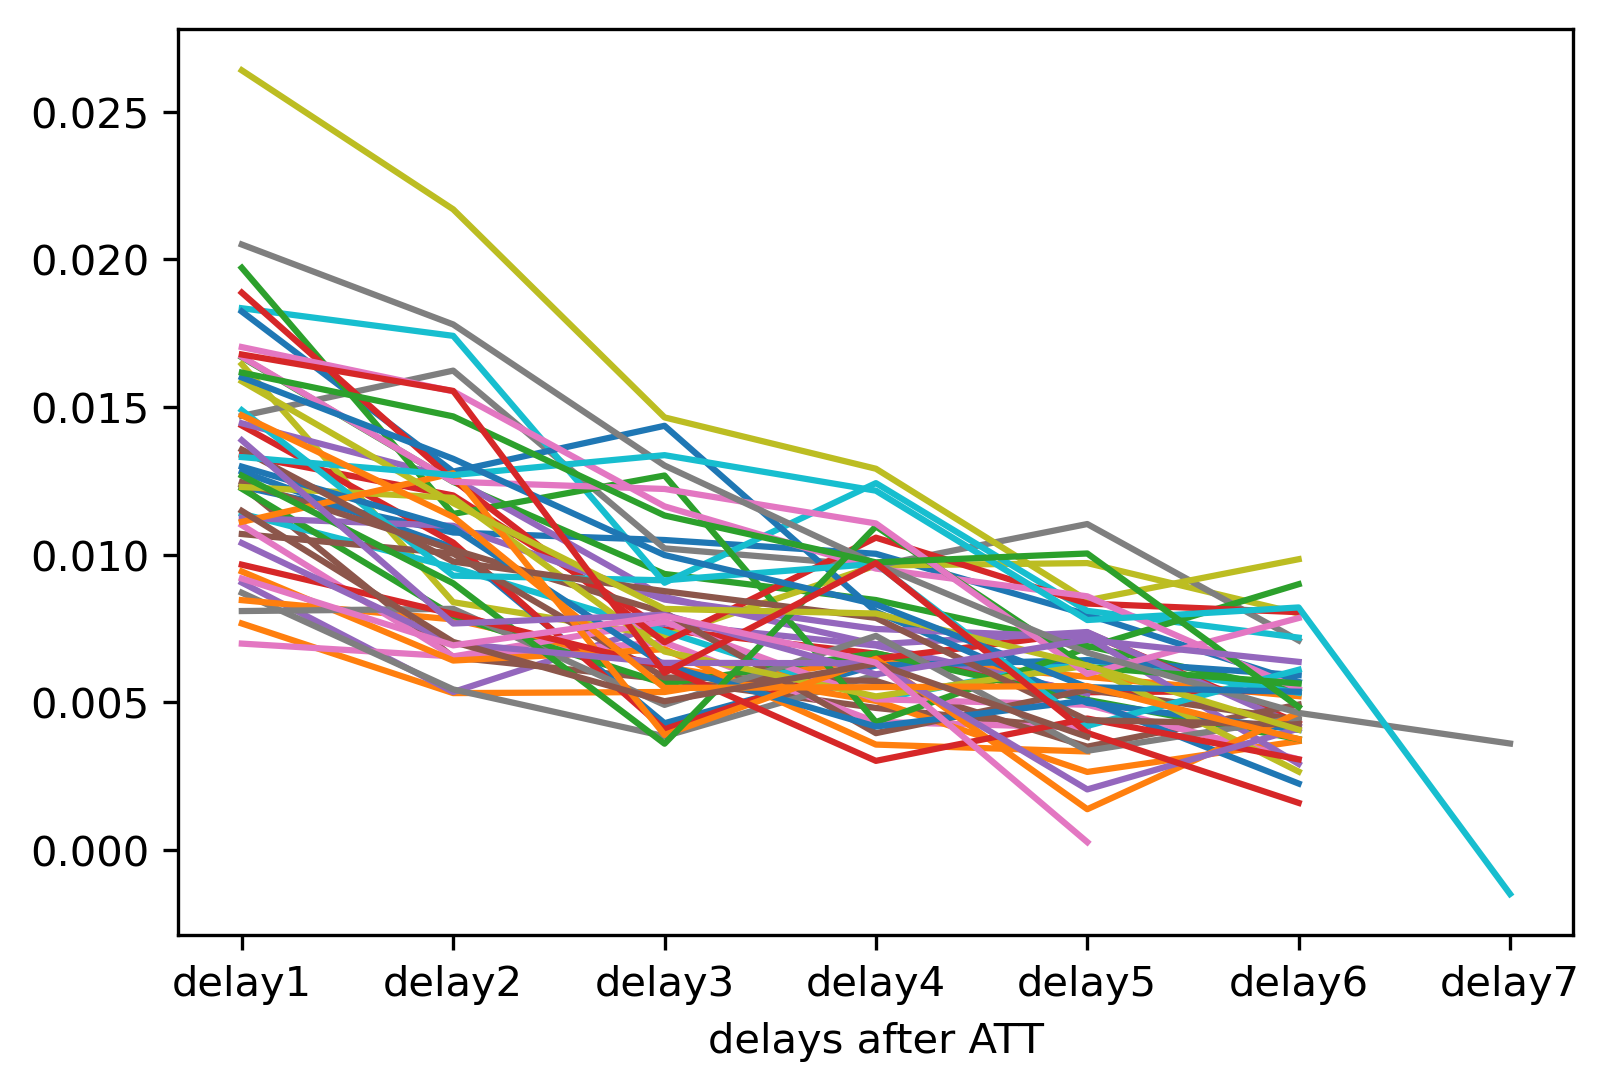

In [3]:
delays = ["delay1", "delay2", "delay3", "delay4", "delay5", "delay6", "delay7"]
fig, ax = plt.subplots()

for index, row in df.iterrows():
    data = row.caudate[1:-1].split(',') # convert string to list
    data = [float(i) for i in data if i != ' None']   
    ax.plot(delays, data, label=row.session_id)
    
plt.xlabel('delays after ATT')
plt.show()

NOTE: Deleted sub-HC004_ses-MR_FOLLOWUP, sub-HC004_ses-MR_BASELINE, sub-HC002_ses-MR_BASELINE

In [4]:
fig = plt.figure(figsize=(38,22))
timepoints = ["delay1", "delay2", "delay3", "delay4", "delay5", "delay6", "delay7"]
rois = ['acc', 'insula', 'caudate', 'putamen', 'gray_matter']

# set font sizes & y axis limits
SMALL_SIZE = 20
MEDIUM_SIZE = 26
LARGE_SIZE = 32
TITLE_SIZE = 38
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('axes', titlesize=LARGE_SIZE)

ylim=[0,0.05]

import matplotlib.gridspec as gridspec
spec = gridspec.GridSpec(ncols=6,nrows=2, figure=fig)

f_ax1 = fig.add_subplot(spec[0,:2])
f_ax2 = fig.add_subplot(spec[0,2:4])
f_ax3 = fig.add_subplot(spec[0,4:])
f_ax4 = fig.add_subplot(spec[1, 1:3])
f_ax5 = fig.add_subplot(spec[1, 3:5])
f_axes= [f_ax1, f_ax2, f_ax3, f_ax4, f_ax5]

for i, ax in enumerate(f_axes):
    if i < len(rois):
        roi = rois[i]
            
        for index, row in df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]   
            ax.plot(delays, data)
            ax.set_ylabel('dM/M0')
            ax.set_ylim(ylim)
            ax.set_title(roi)

plt.xlabel('delays after ATT')
fig.suptitle('dM/M0 Time Series Data: dM/M0 vs PLD', fontsize=TITLE_SIZE)
fig.tight_layout()

# save fig to file
fname="../figs/dMM0_timeseries.png"
plt.savefig(fname, facecolor='white', edgecolor='none')

plt.show()